## Clustering

Last class we studied document vectors and how to find key words and similar documents. What else can we do with vectors? We can cluster them to find natural groups or categories, or visualize them directly by projecting them to 2D or 3D space.

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

We'll start by getting tf-idf vectors for the Menendez press releases, like we did last class.

In [2]:
pr = pd.read_csv('menendez-press-releases.csv')
len(pr)

1530

In [3]:
def tokenize(s):
    blob = TextBlob(s.lower())
    words = [token for token in blob.words if len(token)>2]
    return words

In [4]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
matrix = vectorizer.fit_transform(pr.text)

# The easiest way to see what happenned is to make a dataframe
tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf.head()

,'01,'activist,'acts,'disappointing,'e-verify,'em,'liberty,'ll,'no,'re,...,…oil-drilling,…struggling,…tarp,…that,…the,…then,…there,…these,…this,…we
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We're going to use a clustering algorithm called k-means. Here's an interactive demo of how it works.
See this [interactive demo](http://web.stanford.edu/class/ee103/visualizations/kmeans/kmeans.html) or [this one](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

In [5]:
from sklearn.cluster import KMeans

In [6]:
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Ok, let's see what's in each cluster!

In [7]:
km.cluster_centers_

array([[  3.94584776e-04,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.04501121e-04,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.27004309e-04,   1.12432930e-04, ...,
          0.00000000e+00,   4.66730801e-05,   4.11145223e-05]])

In [8]:
km.labels_[100:300]

array([2, 1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 0, 1, 4, 4, 0, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 0, 1, 2, 1, 1, 4, 0, 4, 0, 1,
       4, 1, 4, 4, 4, 1, 1, 1, 2, 4, 4, 4, 4, 2, 0, 1, 4, 4, 0, 4, 1, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 0, 1, 4, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 0, 0, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1,
       4, 4, 4, 3, 1, 4, 4, 3, 1, 0, 1, 4, 4, 4, 3, 4, 4, 4, 4, 4, 1, 1, 4,
       4, 4, 4, 1, 4, 1, 1, 4, 1, 1, 3, 4, 4, 3, 4, 4, 4, 0, 4, 4, 4, 4, 4,
       4, 4, 1, 3, 4, 4, 4, 4, 4, 4, 1, 1, 4, 3, 1, 4, 4, 2, 4, 4, 1, 1, 0,
       3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 0, 3, 4, 4, 1], dtype=int32)

In [9]:
def print_sorted_vector(v):
    # this "lambda" thing is an anonymous function, google me to unluck bonus coding knowledge
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:10]
    print('\n'.join([str(x) for x in sorted_list]))

Now we're going to print out the top words of the center vector of each cluster, to see how the k-means algorithm did.

In [10]:
centroids = pd.DataFrame(km.cluster_centers_, columns=vectorizer.get_feature_names())
for i in range(number_of_clusters):
    print(f'\nCluster {i}')
    print_sorted_vector(centroids.iloc[i])



Cluster 0
('health', 0.22269054692969764)
('care', 0.12920699137074779)
('insurance', 0.11370807489722615)
('children', 0.10263712321662957)
('autism', 0.077999018812944271)
('coverage', 0.065287740807613986)
('new', 0.060851574939277071)
('jersey', 0.051744866394044464)
('services', 0.045202703632608615)
('families', 0.040678781179253699)

Cluster 1
('new', 0.07452921417713998)
('jersey', 0.070285308273760796)
('funding', 0.056952312641533907)
('lautenberg', 0.055101578196303437)
('federal', 0.039205096111630901)
('menendez', 0.037148081111272241)
('transportation', 0.036173209650286385)
('million', 0.036041822566089496)
('safety', 0.035767165096478315)
('program', 0.035493992255988628)

Cluster 2
('energy', 0.16740773314993695)
('tax', 0.072781038952461657)
('credit', 0.063657595304101575)
('fees', 0.063071982473185059)
('efficiency', 0.055014497895632175)
('card', 0.051961317174771808)
('solar', 0.048634474952924944)
('menendez', 0.041124081443403876)
('consumers', 0.03894768618051

In fact, Overview uses k-means in its "topic tree" visualization

### Visualizing clusters to understand politics
This is a fairly literal translation of a [previous post](http://www.compjournalism.com/?p=13) of mine (it was done in  R at the time). We're going to load up the voting record of the U.K. House of Lords, turn each MP's voting record into a vector, and see how all these politicians relate in this abstract ideological space.

The daia is circa 2012, because they had an interesting coalition government at the time. 

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [12]:
votes = pd.read_csv('uk-lords-votes.csv')
votes.shape

(613, 102)

In [13]:
votes.head()

,mpid,party,1530,1531,1532,1533,1534,1535,1536,1537,...,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629
0,mpid100001,Con,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,-1,-1,1
1,mpid100002,XB,0,1,0,1,1,0,0,0,...,0,1,0,0,-1,1,0,-1,0,0
2,mpid100003,Lab,-1,0,0,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,mpid100004,LDem,1,1,1,-1,-1,0,1,0,...,1,-1,-1,0,-1,1,-1,0,0,-1
4,mpid100006,Lab,-1,-1,0,1,-1,-1,-1,0,...,0,0,0,-1,-1,-1,-1,0,0,-1


This is data I processed earlier, and you can think of it as a template for the format you will need to get your data into to do your homework. Each row is one member of parliament. Each of the numbered columns is one vote, where 1 means aye, 0 means abstain, and -1 means nay. The `party` column indicates which political party that MP belonged to at the time.

If you're interested in the original data, including the names of these politicians and what they were voting on, you can find it all [here](http://www.compjournalism.com/?p=13).

We'll want to turn the list of parties in to a list of colors.

In [14]:
# compute the color that each MP should be, based on their party
def party_color(x):
    p = {
        'Lab' : 'b',
        'XB'  : 'g',
        'Con' : 'r',
        'LDem': 'y',
        'Bp'  : 'purple'
    }
    return p.get(str(x),'black')

colors = [party_color(x) for x in votes['party']]

Now that we've set everything up, we're ready to start projecting. We can view at most three dimensions at once with our puny human visual system. The simplest projection is just to pick three dimensions of our vectors and plot them.

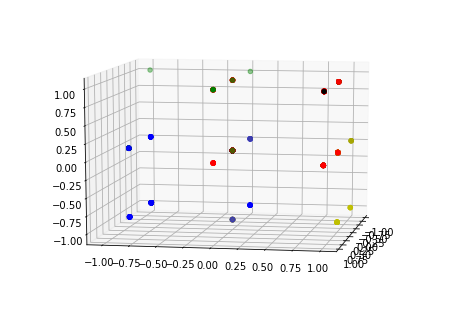

In [15]:
dims = [22, 33, 44]  # no reason for these particular ones

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=10, azim=10)
ax.scatter(votes.iloc[:, dims[0]], votes.iloc[:, dims[1]], votes.iloc[:, dims[2]], c=colors)

Not very interesting. All of vote coordinates are in [-1,0,1] so no matter which votes (dimensions) we pick we can only get the corners, edges, and center of a cube. Plus, all 613 MPs overlap each other -- many MPs voted the same way on this set of three votes -- so we only see a few dots.

Instead, we're going to let the computer pick the right projection from this wacky high dimensional space to two dimensions. We are using PCA, "principal components analysis," which tries to find a direction to project that gives maximum separation of all the points. This dimension doesn't have to be aligned to any of our dimension axes -- PCA will "rotate" the points in high dimensional space until they are as spread out as possible.

In [16]:
model = PCA(n_components=2)
out = model.fit_transform(votes.iloc[:,2:])  # throw out mpid and party, just the vote vectors here


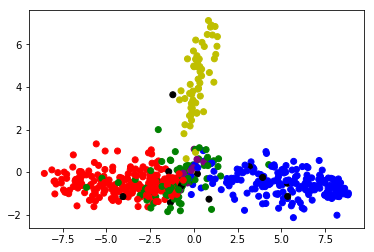

In [17]:
plt.scatter(out[:, 0], out[:, 1], c=colors)
plt.show()

We can actually project down to any number of dimensions. More than 3 but less than the original 100 can be useful for some data processing operations.) Here, we'll project down to 3 and take a look at our voting clusters in glorious 3D.

In [18]:
model = PCA(n_components=3)
out = model.fit_transform(votes.iloc[:,2:])  # throw out mpid and party, just the vote vectors here


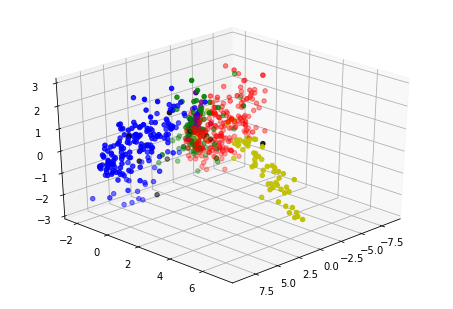

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=30, azim=45)
ax.scatter(out[:, 0], out[:, 1], out[:, 2], c=colors)